# Regresión lineal — descenso de gradiente

We fit the model $\hat{y} = \theta^T x$ by minimizing the cost $J(\theta)$ using gradient descent.

## Imports

We use **NumPy** for array operations and linear algebra. The function `load_regression_data` from `utils` loads the design matrix $X$ and target vector $y$.

In [1]:
import numpy as np
from utils import load_regression_data


### Funciones para la Regresion Lineal

### Hypothesis

The linear model predicts $\hat{y}^{(i)} = \theta^T x^{(i)}$. In matrix form, with $X$ of shape $(n+1) \times m$ (each column is a sample $x^{(i)}$) and $\theta$ of shape $(n+1) \times 1$:

$$
h_\theta(X) = \theta^T X \quad \Rightarrow \quad \text{shape } (1 \times m)
$$

The code returns `np.dot(np.transpose(theta), X)`.

In [2]:
def h(X, theta):
    'Hipotesis para la regresion lineal, devuelve una matriz de (1, m)'
    return np.dot(np.transpose(theta), X)


### Cost function

Mean squared error over the $m$ samples:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \bigl( h_\theta(x^{(i)}) - y^{(i)} \bigr)^2
$$

The code uses `(1/(2*m)) * np.sum(np.square(h(X, theta) - y))`.

In [3]:
def J(X, y, theta):
    'Funcion de costo, devuelve un escalar'
    m = X.shape[1]
    return (1 / (2 * m)) * np.sum(np.square(h(X, theta) - y))

### Gradient of the cost

The gradient of $J$ with respect to $\theta$ (column vector of shape $(n+1) \times 1$) is:

$$
\frac{\partial J}{\partial \theta} = \frac{1}{m} X \, (h_\theta(X) - y)^T
$$

Implemented as `(1/m) * np.dot((h(X, theta) - y), np.transpose(X)).reshape((-1, 1))`.

In [4]:
def dJ(X, y, theta):
    'Gradiente del costo devuelve una matriz de (n + 1, 1)'
    m = X.shape[1]
    return (1 / m) * np.dot((h(X, theta) - y), np.transpose(X)).reshape((-1, 1))

## Load the data

`load_regression_data()` returns the design matrix $X$ (e.g. shape $(n \times m)$) and targets $y$ (e.g. shape $(1 \times m)$).

In [5]:
X, y = load_regression_data()

## Data exploration

Inspect the shape of $X$ and $y$, and optionally the mean and standard deviation of each feature (rows of $X$).

In [6]:
X.shape

(10, 442)

In [7]:
y.shape

(1, 442)

In [8]:
np.mean(X, axis=1)

array([-1.44429466e-18,  2.54321451e-18, -2.25592546e-16, -4.85408596e-17,
       -1.42859580e-17,  3.89881064e-17, -6.02836031e-18, -1.78809958e-17,
        9.24348582e-17,  1.35176953e-17])

In [9]:
np.std(X, axis=1)

array([0.04756515, 0.04756515, 0.04756515, 0.04756515, 0.04756515,
       0.04756515, 0.04756515, 0.04756515, 0.04756515, 0.04756515])

## Add bias (intercept)

Prepend a row of ones to $X$ so the first component of $\theta$ is the intercept. Then $X$ has shape $(n+1) \times m$ and the model is $\hat{y} = \theta^T x$ with $x_0 = 1$:

$$
X \gets [\mathbf{1}; X]
$$

In [10]:
m = X.shape[1]
unos = np.ones((1, m))
X = np.append(unos, X, axis=0)

In [11]:
X.shape

(11, 442)

## Hyperparameters

$\alpha$ = learning rate; number of iterations for gradient descent.

In [12]:
alpha = 0.1
iteraciones = 500

## Initialize $\theta$

Random initialization, shape $(n+1) \times 1$ to match the rows of $X$.

In [13]:
theta = np.random.random((X.shape[0], 1))

## Training log and initial cost

Initialize lists to record the cost at each step; compute and print $J(\theta)$ at the start.

In [14]:
registro_grads = []
registro_J = []
J_init = J(X, y, theta)
print(f'Costo inicial: {J_init}')
registro_J.append(J_init)

Costo inicial: 14385.929371799371


## Gradient descent loop

At each iteration: compute the gradient $\frac{\partial J}{\partial \theta}$, then update:

$$
\theta \leftarrow \theta - \alpha \frac{\partial J}{\partial \theta}
$$

Record $J(\theta)$ after each update to plot the cost curve.

In [15]:
for i in range(iteraciones):
    # calcular la gradiente
    dtheta = dJ(X, y, theta)
    # actualizar parametros (descenso de gradiente)
    theta = theta - alpha * dtheta

    registro_J.append(J(X, y, theta))

print(f'Costo final: {J(X, y, theta)}')

Costo final: 2287.344473066193


## Cost curve

Plot $J(\theta)$ vs iteration index to check that the cost decreases (convergence).

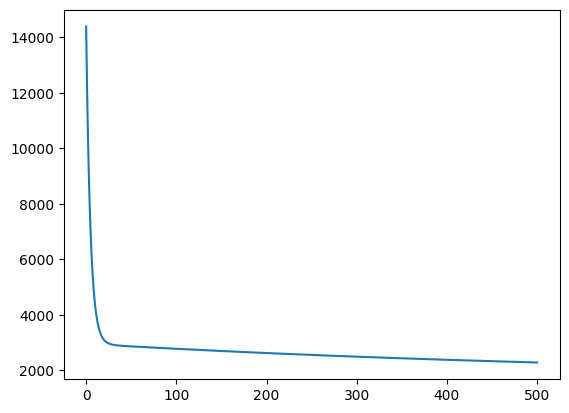

In [16]:
import matplotlib.pyplot as plt
it = list(range(iteraciones + 1))
plt.plot(it, registro_J)
plt.show()

## Making a prediction

With the fitted $\theta$, we can predict $y$ for any new input $x_{\text{new}}$ using the same model:

$$
\hat{y} = \theta^T x_{\text{new}}
$$

The new sample must include the bias term (first component $= 1$) and have the same number of features as in training. Below we build a random feature vector, prepend 1, and apply the hypothesis.

In [17]:
# Random new sample: same number of features as training (excluding bias)
n_features = theta.shape[0] - 1
np.random.seed(42)
x_new = np.random.randn(n_features, 1)
# Prepend 1 for the intercept (same as training data)
x_new_with_bias = np.append(np.ones((1, 1)), x_new, axis=0)
# Predict: hat{y} = theta^T x_new
y_pred = h(x_new_with_bias, theta)
print(f"Random input shape: {x_new.shape} (features only)")
print(f"With bias: {x_new_with_bias.shape}")
print(f"Predicted y: {y_pred[0, 0]:.4f}")

Random input shape: (10, 1) (features only)
With bias: (11, 1)
Predicted y: 263.0511
